Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



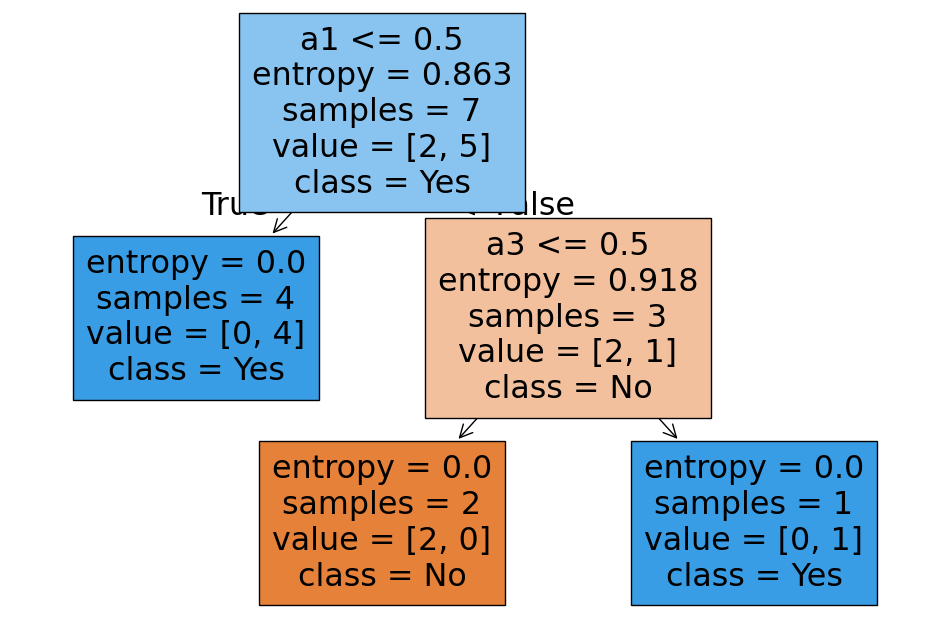

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


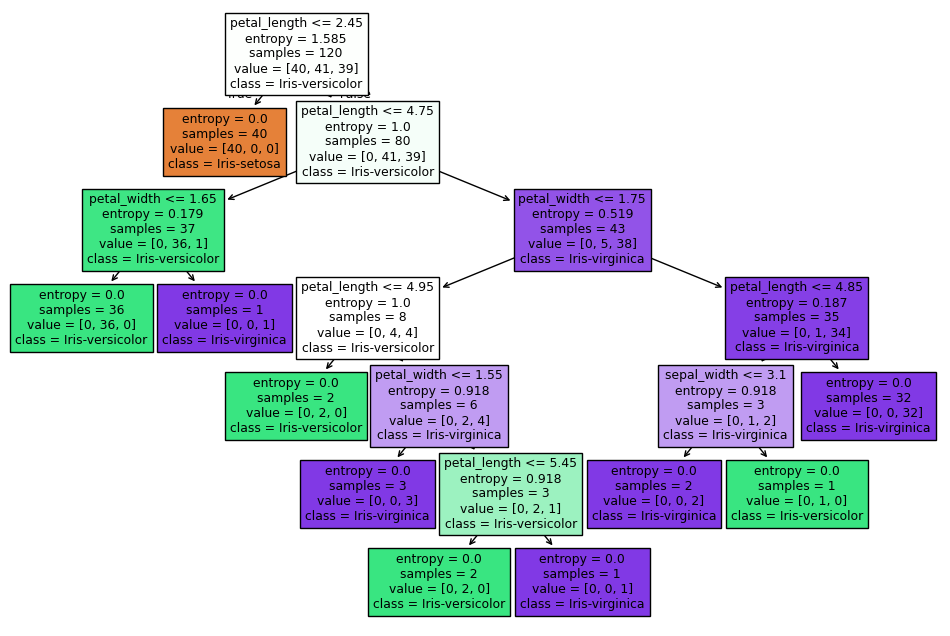

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the IRIS dataset from CSV
iris_df = pd.read_csv('iris.csv')

# Split dataset into features and target
X = iris_df.iloc[:, :-1]  # All columns except the last one
y = iris_df.iloc[:, -1]   # Last column as target

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features

# Load datasets
iris = pd.read_csv("iris.csv")
drug = pd.read_csv("drug.csv")
petrol = pd.read_csv("petrol_consumption.csv")

# --- Decision Tree Classifier for IRIS dataset ---
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Decision Tree Classification for IRIS Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Decision Tree Classifier for Drug dataset ---
X_drug = drug.iloc[:, :-1]
y_drug = drug.iloc[:, -1]

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical features in X_drug
for col in X_drug.select_dtypes(include=['object']).columns:
    X_drug[col] = le.fit_transform(X_drug[col]) # Encode categorical features to numerical values

X_train, X_test, y_train, y_test = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("\nDecision Tree Classification for Drug Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Decision Tree Regression for Petrol Consumption ---
X_petrol = petrol.iloc[:, :-1]
y_petrol = petrol.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

print("\nDecision Tree Regression for Petrol Consumption:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Decision Tree Classification for IRIS Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Decision Tree Classification for Drug Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00 